Look at VG, etc., over time under the Tennessen et al. demographic model for Europeans.

In [1]:
%matplotlib inline
import pandas as pd
from tennessen import get_nlist
import matplotlib
import matplotlib.pyplot as plt

/data/apps/user_contributed_software/krthornt/python/2.7.10/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
N=get_nlist()

In [3]:
len(N)

79020

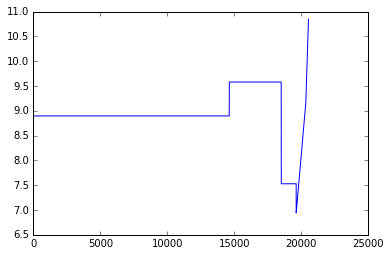

In [4]:
import numpy as np
plt.plot(np.log(N[8*N[0]+1:]))

In [5]:
import glob

In [6]:
L=[0.025, 0.05, 0.1, 0.25, 0.5]
H=[0,0.1,0.25,1]

In [10]:
#First, we're going to take all the raw input data
#and make a smaller summary file.  This will make plotting 
#much faster...
import os.path
if os.path.isfile('statsummary.h5') is False:
    out=pd.HDFStore('statsummary.h5',complevel=6,complib='zlib')
    for l in L:
        files=glob.glob('gbr.lambda'+str(l)+'*stats*.h5')
        for f in files:
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).median()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['g']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        files=glob.glob('additive.lambda'+str(l)+'*stats*.h5')
        for f in files:
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).median()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['a']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        for h in H:
            f='multi.lambda'+str(l)+'.stats.h'+str(h)+'.h5'
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).median()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['m']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[float(h)]*len(xgt.index)
            out.append('statsumm',xgt)
    out.close()

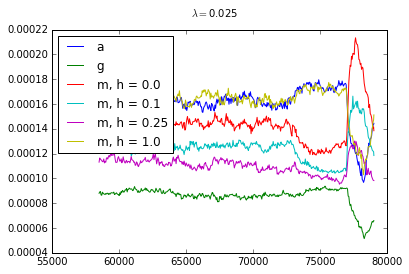

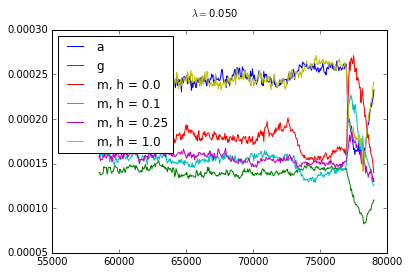

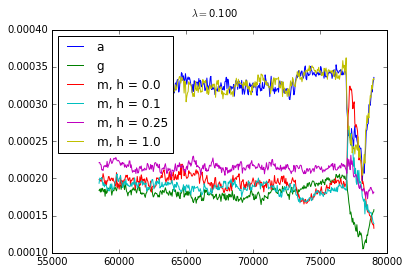

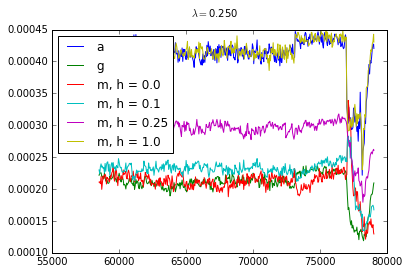

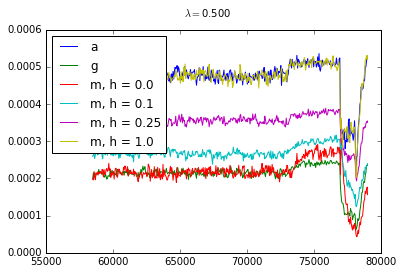

In [27]:
#Now, do some actual plotting
s=pd.read_hdf('statsummary.h5')
for e in s.e.unique():
    fig=plt.figure()
    for m in sorted(s.model.unique()):
        if m != 'm':
            si=s[(s.model==m)&(s.e==e)]
            plt.plot(si.generation[si.stat=='VG'],si.value[si.stat=='VG'],label=m)
        else:
            for h in sorted(s.h.unique()):
                si=s[(s.model==m)&(s.e==e)&(s.h==h)]
                plt.plot(si.generation[si.stat=='VG'],si.value[si.stat=='VG'],label=m+', h = '+'{0:0.3}'.format(h))
    plt.legend(loc='upper left')
    plt.suptitle(r'$\lambda =$'+'{0:0.3f}'.format(e))
    plt.show()